# Requirements

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import numpy as np

In [31]:
# Add as many imports as you need.
import numpy as np
import pandas as pd

# Add as many imports as you need.
# Add as many imports as you need.
from VNP.packages.data_alalysis import *
from VNP.packages.data_preperation import *
from VNP.packages.missing_values import *
from VNP.packages.visualization import *
from VNP.packages.models import *
from VNP.packages.evaluation import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Obesity Analysis


# Dataset Description

## Attributes

- id: represents a unique identifier for each participant or record in the dataset.
- Gender: Represents the gender of the individual.
- Age: Indicates the age of the individual.
- Height - Represents the height of the individual.
- Weight: Represents the weight of the individual.
- FCVC Frequency of Consumption of Vegetables
- NCP - Number of Main Meals per Day
- SMOKE - Indicates whether the individual smokes
- CH2O - Consumption of Water
- TUE - Time Using Electronic Devices
- MTRANS - Mode of Transportation
- NObeyesdad - Nutritional Obesity Status, obesity class

### Target variable
- FAF Frequency of Physical Activity

# Read the dataset

In [32]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv("./data/obesity.csv")
df

Unnamed: 0       id  Gender        Age    Height      Weight      FCVC  \
0               0      0.0    Male  24.443011  1.699998   81.669950  2.000000   
1               1      1.0  Female  18.000000  1.560000   57.000000  2.000000   
2               2      2.0  Female  18.000000       NaN   50.165754       NaN   
3               3      3.0     NaN  20.952737  1.710730  131.274851  3.000000   
4               4      NaN    Male  31.641081  1.914186         NaN       NaN   
...           ...      ...     ...        ...       ...         ...       ...   
20753       20753  20753.0     NaN        NaN       NaN  114.187096  2.919584   
20754       20754  20754.0    Male  18.000000  1.710000   50.000000       NaN   
20755       20755      NaN    Male  20.101026  1.819557  105.580491  2.407817   
20756       20756  20756.0     NaN  33.852953  1.700000   83.520113       NaN   
20757       20757  20757.0    Male  26.680376  1.816547  118.134898  3.000000   

            NCP SMOKE      CH2O       FAF       TUE                 MTRANS  \
0      2.983297    no  2.763573  0.000000  0.976473  Public_Transportation   
1      3.000000    no       NaN       NaN  1.000000             Automobile   
2      1.411685    no       NaN  0.866045       NaN  Public_Transportation   
3      3.000000    no  1.674061  1.467863  0.780199  Public_Transportation   
4      1.971472    no       NaN  1.967973  0.931721  Public_Transportation   
...         ...   ...       ...       ...       ...                    ...   
20753  3.000000    no  2.151809  1.330519  0.196680  Public_Transportation   
20754       NaN    no  1.000000       NaN       NaN                    NaN   
20755  3.000000    no  2.000000  1.158040  1.198439  Public_Transportation   
20756  1.971472   NaN  2.144838  0.000000       NaN                    NaN   
20757  3.000000    no  2.003563  0.684487  0.713823  Public_Transportation   

                NObeyesdad  
0                      NaN  
1            Normal_Weight  
2      Insufficient_Weight  
3                      NaN  
4      Overweight_Level_II  
...                    ...  
20753      Obesity_Type_II  
20754  Insufficient_Weight  
20755                  NaN  
20756                  NaN  
20757      Obesity_Type_II  

[20758 rows x 14 columns]

In [33]:
df.drop(columns="id", inplace=True)

In [34]:
df.drop(columns="Unnamed: 0", inplace=True)

In [35]:
df

Gender        Age    Height      Weight      FCVC       NCP SMOKE  \
0        Male  24.443011  1.699998   81.669950  2.000000  2.983297    no   
1      Female  18.000000  1.560000   57.000000  2.000000  3.000000    no   
2      Female  18.000000       NaN   50.165754       NaN  1.411685    no   
3         NaN  20.952737  1.710730  131.274851  3.000000  3.000000    no   
4        Male  31.641081  1.914186         NaN       NaN  1.971472    no   
...       ...        ...       ...         ...       ...       ...   ...   
20753     NaN        NaN       NaN  114.187096  2.919584  3.000000    no   
20754    Male  18.000000  1.710000   50.000000       NaN       NaN    no   
20755    Male  20.101026  1.819557  105.580491  2.407817  3.000000    no   
20756     NaN  33.852953  1.700000   83.520113       NaN  1.971472   NaN   
20757    Male  26.680376  1.816547  118.134898  3.000000  3.000000    no   

           CH2O       FAF       TUE                 MTRANS  \
0      2.763573  0.000000  0.976473  Public_Transportation   
1           NaN       NaN  1.000000             Automobile   
2           NaN  0.866045       NaN  Public_Transportation   
3      1.674061  1.467863  0.780199  Public_Transportation   
4           NaN  1.967973  0.931721  Public_Transportation   
...         ...       ...       ...                    ...   
20753  2.151809  1.330519  0.196680  Public_Transportation   
20754  1.000000       NaN       NaN                    NaN   
20755  2.000000  1.158040  1.198439  Public_Transportation   
20756  2.144838  0.000000       NaN                    NaN   
20757  2.003563  0.684487  0.713823  Public_Transportation   

                NObeyesdad  
0                      NaN  
1            Normal_Weight  
2      Insufficient_Weight  
3                      NaN  
4      Overweight_Level_II  
...                    ...  
20753      Obesity_Type_II  
20754  Insufficient_Weight  
20755                  NaN  
20756                  NaN  
20757      Obesity_Type_II  

[20758 rows x 12 columns]

Explore the dataset using visualizations of your choice.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      16634 non-null  object 
 1   Age         16608 non-null  float64
 2   Height      16667 non-null  float64
 3   Weight      16477 non-null  float64
 4   FCVC        16641 non-null  float64
 5   NCP         16697 non-null  float64
 6   SMOKE       16648 non-null  object 
 7   CH2O        16597 non-null  float64
 8   FAF         16619 non-null  float64
 9   TUE         16611 non-null  float64
 10  MTRANS      16600 non-null  object 
 11  NObeyesdad  16625 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.9+ MB


In [37]:
# Write your code here. Add as many boxes as you need.
missing_table(df)

Feature  CountMissing  PercentageMissing  Total
0       Gender          4124          19.867039  20758
1          Age          4150          19.992292  20758
2       Height          4091          19.708064  20758
3       Weight          4281          20.623374  20758
4         FCVC          4117          19.833317  20758
5          NCP          4061          19.563542  20758
6        SMOKE          4110          19.799595  20758
7         CH2O          4161          20.045284  20758
8          FAF          4139          19.939301  20758
9          TUE          4147          19.977840  20758
10      MTRANS          4158          20.030831  20758
11  NObeyesdad          4133          19.910396  20758

In [38]:
df["SMOKE"].replace("yes", 1, inplace=True)
df["SMOKE"].replace("no", 0, inplace=True)
df

C:\Users\User-PC\AppData\Local\Temp\ipykernel_18544\4129794393.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["SMOKE"].replace("yes", 1, inplace=True)
C:\Users\User-PC\AppData\Local\Temp\ipykernel_18544\4129794393.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

Gender        Age    Height      Weight      FCVC       NCP  SMOKE  \
0        Male  24.443011  1.699998   81.669950  2.000000  2.983297    0.0   
1      Female  18.000000  1.560000   57.000000  2.000000  3.000000    0.0   
2      Female  18.000000       NaN   50.165754       NaN  1.411685    0.0   
3         NaN  20.952737  1.710730  131.274851  3.000000  3.000000    0.0   
4        Male  31.641081  1.914186         NaN       NaN  1.971472    0.0   
...       ...        ...       ...         ...       ...       ...    ...   
20753     NaN        NaN       NaN  114.187096  2.919584  3.000000    0.0   
20754    Male  18.000000  1.710000   50.000000       NaN       NaN    0.0   
20755    Male  20.101026  1.819557  105.580491  2.407817  3.000000    0.0   
20756     NaN  33.852953  1.700000   83.520113       NaN  1.971472    NaN   
20757    Male  26.680376  1.816547  118.134898  3.000000  3.000000    0.0   

           CH2O       FAF       TUE                 MTRANS  \
0      2.763573  0.000000  0.976473  Public_Transportation   
1           NaN       NaN  1.000000             Automobile   
2           NaN  0.866045       NaN  Public_Transportation   
3      1.674061  1.467863  0.780199  Public_Transportation   
4           NaN  1.967973  0.931721  Public_Transportation   
...         ...       ...       ...                    ...   
20753  2.151809  1.330519  0.196680  Public_Transportation   
20754  1.000000       NaN       NaN                    NaN   
20755  2.000000  1.158040  1.198439  Public_Transportation   
20756  2.144838  0.000000       NaN                    NaN   
20757  2.003563  0.684487  0.713823  Public_Transportation   

                NObeyesdad  
0                      NaN  
1            Normal_Weight  
2      Insufficient_Weight  
3                      NaN  
4      Overweight_Level_II  
...                    ...  
20753      Obesity_Type_II  
20754  Insufficient_Weight  
20755                  NaN  
20756                  NaN  
20757      Obesity_Type_II  

[20758 rows x 12 columns]

In [39]:
df["Gender"].replace("Male", 1, inplace=True)
df["Gender"].replace("Female", 0, inplace=True)
df

C:\Users\User-PC\AppData\Local\Temp\ipykernel_18544\2506470927.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].replace("Male", 1, inplace=True)
C:\Users\User-PC\AppData\Local\Temp\ipykernel_18544\2506470927.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

Gender        Age    Height      Weight      FCVC       NCP  SMOKE  \
0         1.0  24.443011  1.699998   81.669950  2.000000  2.983297    0.0   
1         0.0  18.000000  1.560000   57.000000  2.000000  3.000000    0.0   
2         0.0  18.000000       NaN   50.165754       NaN  1.411685    0.0   
3         NaN  20.952737  1.710730  131.274851  3.000000  3.000000    0.0   
4         1.0  31.641081  1.914186         NaN       NaN  1.971472    0.0   
...       ...        ...       ...         ...       ...       ...    ...   
20753     NaN        NaN       NaN  114.187096  2.919584  3.000000    0.0   
20754     1.0  18.000000  1.710000   50.000000       NaN       NaN    0.0   
20755     1.0  20.101026  1.819557  105.580491  2.407817  3.000000    0.0   
20756     NaN  33.852953  1.700000   83.520113       NaN  1.971472    NaN   
20757     1.0  26.680376  1.816547  118.134898  3.000000  3.000000    0.0   

           CH2O       FAF       TUE                 MTRANS  \
0      2.763573  0.000000  0.976473  Public_Transportation   
1           NaN       NaN  1.000000             Automobile   
2           NaN  0.866045       NaN  Public_Transportation   
3      1.674061  1.467863  0.780199  Public_Transportation   
4           NaN  1.967973  0.931721  Public_Transportation   
...         ...       ...       ...                    ...   
20753  2.151809  1.330519  0.196680  Public_Transportation   
20754  1.000000       NaN       NaN                    NaN   
20755  2.000000  1.158040  1.198439  Public_Transportation   
20756  2.144838  0.000000       NaN                    NaN   
20757  2.003563  0.684487  0.713823  Public_Transportation   

                NObeyesdad  
0                      NaN  
1            Normal_Weight  
2      Insufficient_Weight  
3                      NaN  
4      Overweight_Level_II  
...                    ...  
20753      Obesity_Type_II  
20754  Insufficient_Weight  
20755                  NaN  
20756                  NaN  
20757      Obesity_Type_II  

[20758 rows x 12 columns]

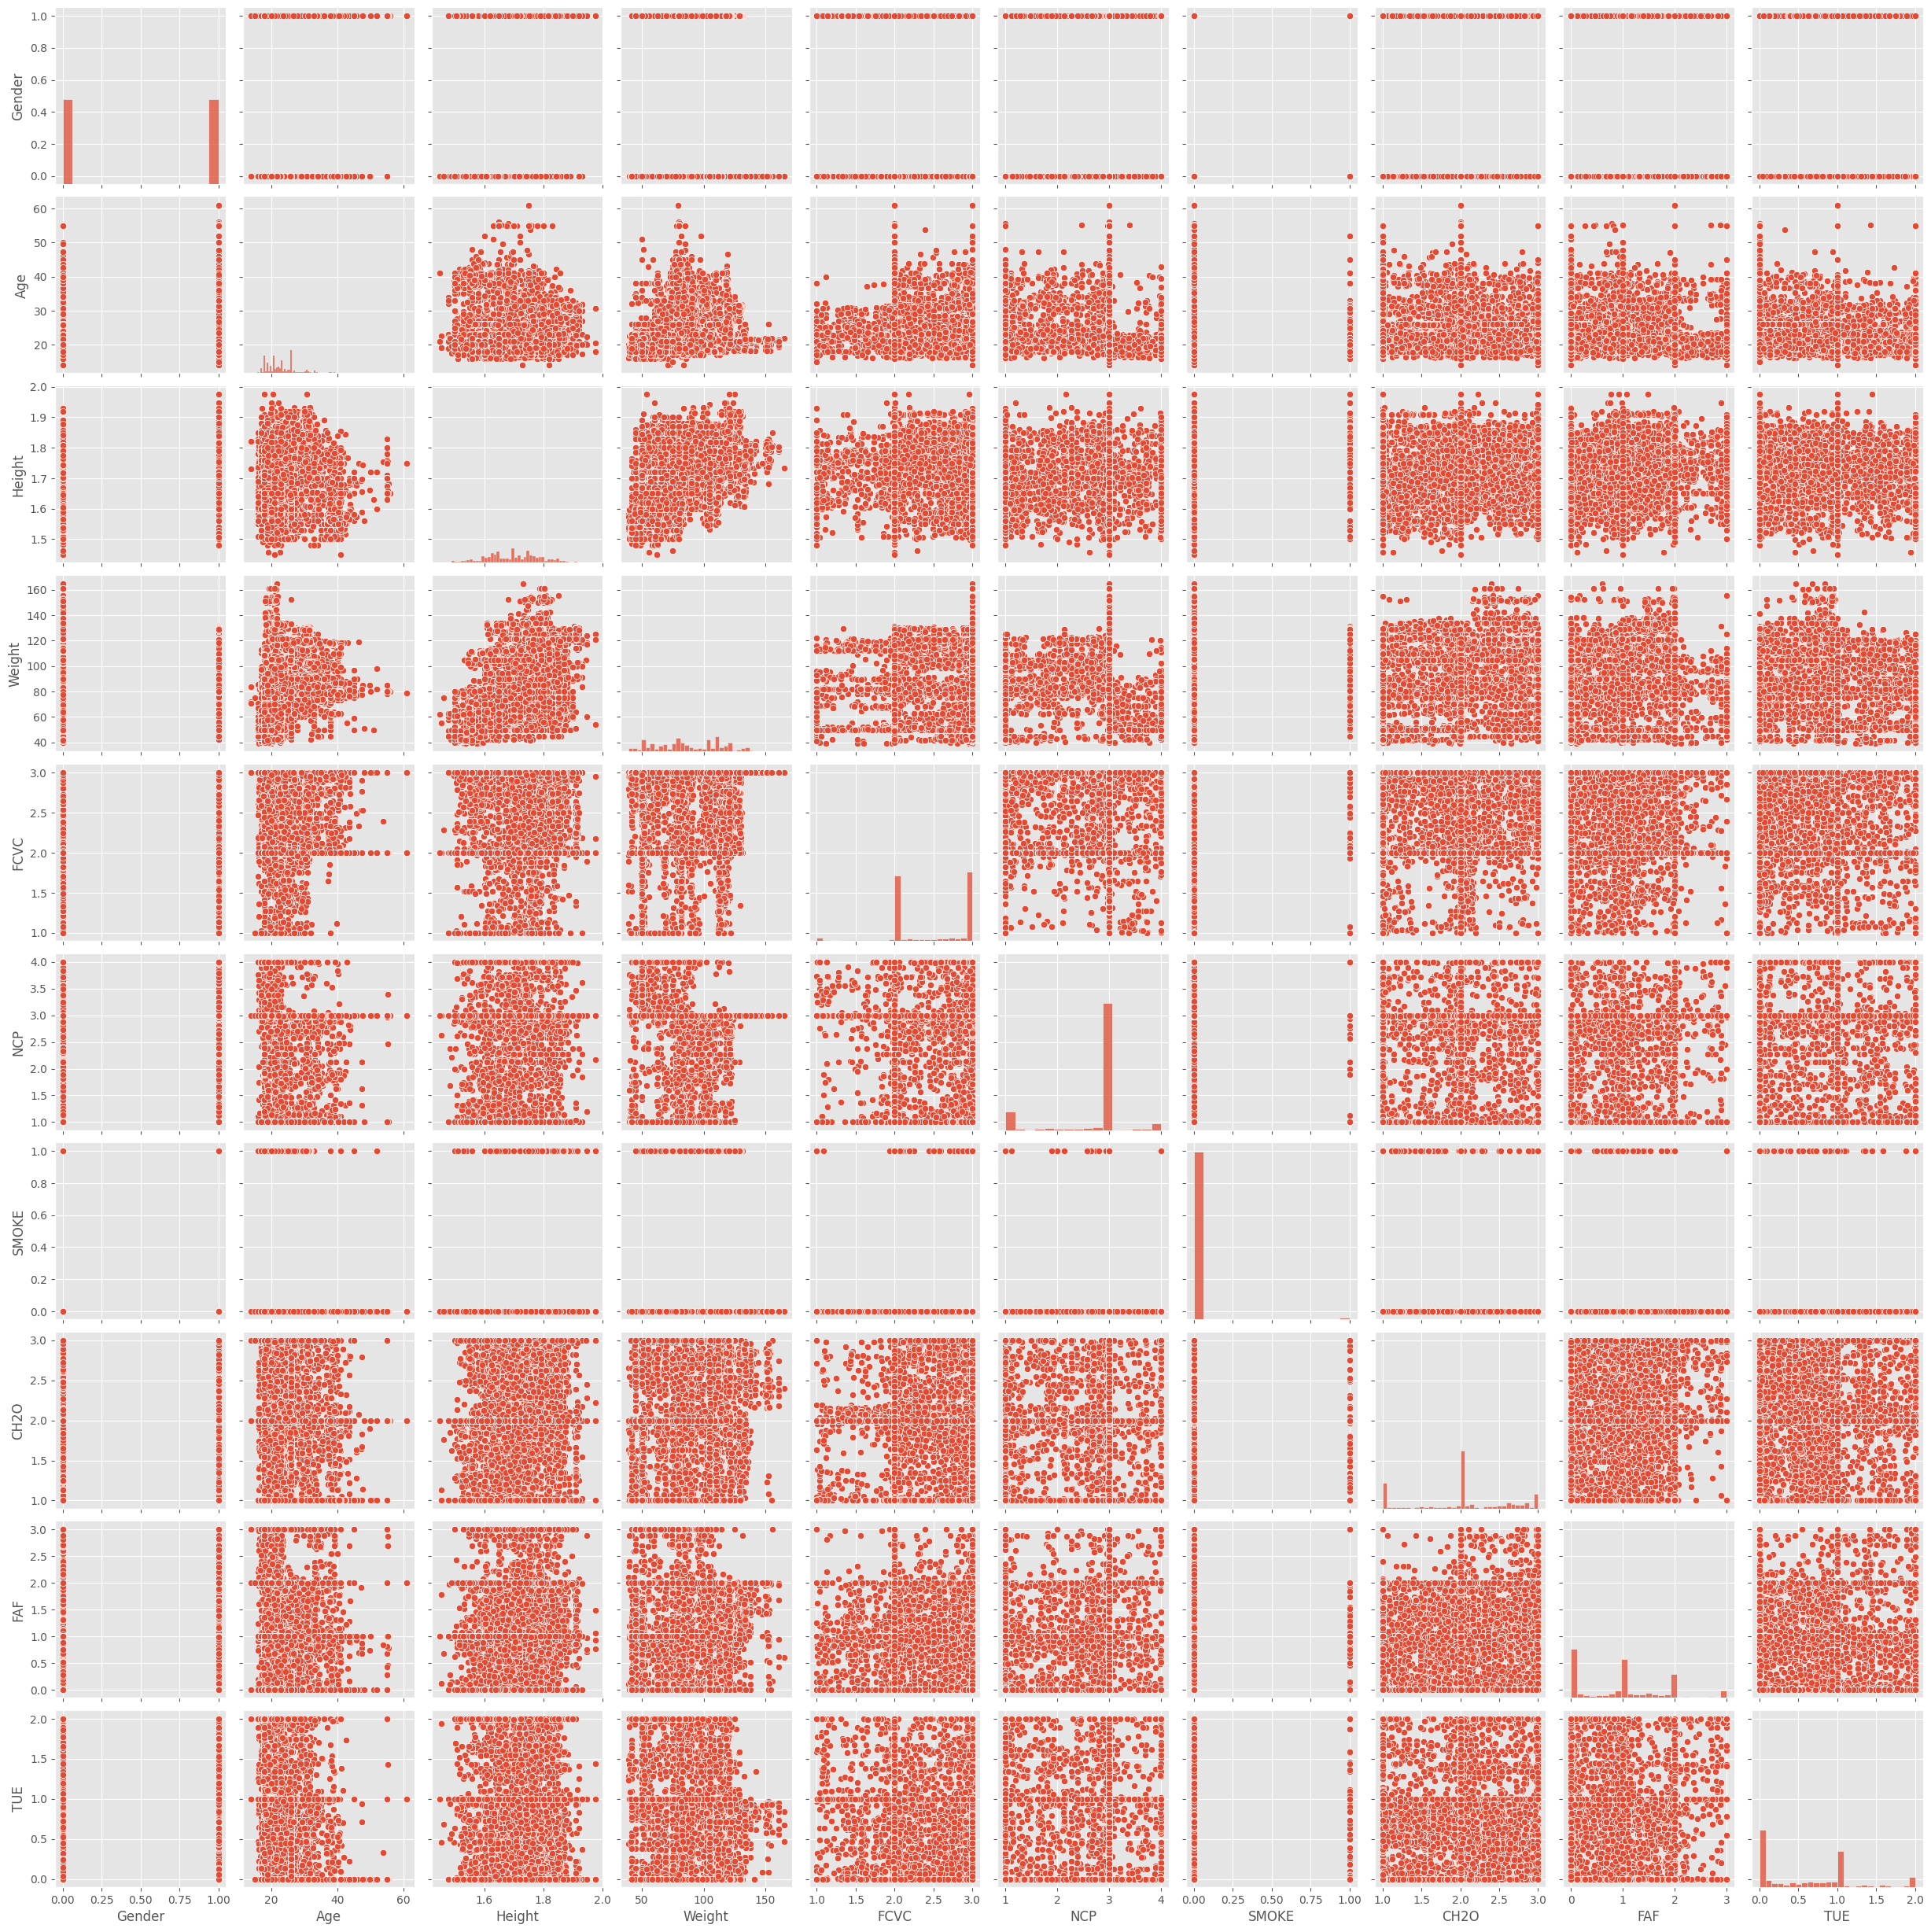

In [40]:
sns.pairplot(df)

In [41]:
df_copy =  df.dropna(subset="FAF", axis=0)
df_copy

Gender        Age    Height      Weight      FCVC       NCP  SMOKE  \
0         1.0  24.443011  1.699998   81.669950  2.000000  2.983297    0.0   
2         0.0  18.000000       NaN   50.165754       NaN  1.411685    0.0   
3         NaN  20.952737  1.710730  131.274851  3.000000  3.000000    0.0   
4         1.0  31.641081  1.914186         NaN       NaN  1.971472    0.0   
5         1.0  18.128249  1.748524   51.552595  2.919751  3.000000    0.0   
...       ...        ...       ...         ...       ...       ...    ...   
20752     0.0  40.000000       NaN   77.561602       NaN       NaN    0.0   
20753     NaN        NaN       NaN  114.187096  2.919584  3.000000    0.0   
20755     1.0  20.101026  1.819557  105.580491  2.407817  3.000000    0.0   
20756     NaN  33.852953  1.700000   83.520113       NaN  1.971472    NaN   
20757     1.0  26.680376  1.816547  118.134898  3.000000  3.000000    0.0   

           CH2O       FAF       TUE                 MTRANS  \
0      2.763573  0.000000  0.976473  Public_Transportation   
2           NaN  0.866045       NaN  Public_Transportation   
3      1.674061  1.467863  0.780199  Public_Transportation   
4           NaN  1.967973  0.931721  Public_Transportation   
5      2.137550  1.930033       NaN  Public_Transportation   
...         ...       ...       ...                    ...   
20752  1.131169  0.281734  0.522259                    NaN   
20753  2.151809  1.330519  0.196680  Public_Transportation   
20755  2.000000  1.158040  1.198439  Public_Transportation   
20756  2.144838  0.000000       NaN                    NaN   
20757  2.003563  0.684487  0.713823  Public_Transportation   

                NObeyesdad  
0                      NaN  
2      Insufficient_Weight  
3                      NaN  
4      Overweight_Level_II  
5                      NaN  
...                    ...  
20752       Obesity_Type_I  
20753      Obesity_Type_II  
20755                  NaN  
20756                  NaN  
20757      Obesity_Type_II  

[16619 rows x 12 columns]

In [42]:
missing_table(df_copy)

Feature  CountMissing  PercentageMissing  Total
0       Gender          3305          19.886876  16619
1          Age          3308          19.904928  16619
2       Height          3262          19.628136  16619
3       Weight          3397          20.440460  16619
4         FCVC          3315          19.947049  16619
5          NCP          3237          19.477706  16619
6        SMOKE          3293          19.814670  16619
7         CH2O          3338          20.085444  16619
8          FAF             0           0.000000  16619
9          TUE          3331          20.043324  16619
10      MTRANS          3381          20.344184  16619
11  NObeyesdad          3313          19.935014  16619

In [43]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16619 entries, 0 to 20757
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      13314 non-null  float64
 1   Age         13311 non-null  float64
 2   Height      13357 non-null  float64
 3   Weight      13222 non-null  float64
 4   FCVC        13304 non-null  float64
 5   NCP         13382 non-null  float64
 6   SMOKE       13326 non-null  float64
 7   CH2O        13281 non-null  float64
 8   FAF         16619 non-null  float64
 9   TUE         13288 non-null  float64
 10  MTRANS      13238 non-null  object 
 11  NObeyesdad  13306 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.6+ MB


In [44]:
ordinal_encoder = OrdinalEncoder()
tmp = ordinal_encoder.fit_transform(df_copy[["MTRANS"]])
type(tmp)

numpy.ndarray

In [45]:
ordinal_encoder.categories_

[array(['Automobile', 'Bike', 'Motorbike', 'Public_Transportation',
        'Walking', nan], dtype=object)]

In [46]:
df_copy["MTRANS"] = tmp

C:\Users\User-PC\AppData\Local\Temp\ipykernel_18544\2023989865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["MTRANS"] = tmp


In [47]:
df_copy

Gender        Age    Height      Weight      FCVC       NCP  SMOKE  \
0         1.0  24.443011  1.699998   81.669950  2.000000  2.983297    0.0   
2         0.0  18.000000       NaN   50.165754       NaN  1.411685    0.0   
3         NaN  20.952737  1.710730  131.274851  3.000000  3.000000    0.0   
4         1.0  31.641081  1.914186         NaN       NaN  1.971472    0.0   
5         1.0  18.128249  1.748524   51.552595  2.919751  3.000000    0.0   
...       ...        ...       ...         ...       ...       ...    ...   
20752     0.0  40.000000       NaN   77.561602       NaN       NaN    0.0   
20753     NaN        NaN       NaN  114.187096  2.919584  3.000000    0.0   
20755     1.0  20.101026  1.819557  105.580491  2.407817  3.000000    0.0   
20756     NaN  33.852953  1.700000   83.520113       NaN  1.971472    NaN   
20757     1.0  26.680376  1.816547  118.134898  3.000000  3.000000    0.0   

           CH2O       FAF       TUE  MTRANS           NObeyesdad  
0      2.763573  0.000000  0.976473     3.0                  NaN  
2           NaN  0.866045       NaN     3.0  Insufficient_Weight  
3      1.674061  1.467863  0.780199     3.0                  NaN  
4           NaN  1.967973  0.931721     3.0  Overweight_Level_II  
5      2.137550  1.930033       NaN     3.0                  NaN  
...         ...       ...       ...     ...                  ...  
20752  1.131169  0.281734  0.522259     NaN       Obesity_Type_I  
20753  2.151809  1.330519  0.196680     3.0      Obesity_Type_II  
20755  2.000000  1.158040  1.198439     3.0                  NaN  
20756  2.144838  0.000000       NaN     NaN                  NaN  
20757  2.003563  0.684487  0.713823     3.0      Obesity_Type_II  

[16619 rows x 12 columns]

In [55]:
df_copy["NObeyesdad"] = ordinal_encoder.fit_transform(df_copy[["NObeyesdad"]])
df_copy

C:\Users\User-PC\AppData\Local\Temp\ipykernel_18544\3564418882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["NObeyesdad"] = ordinal_encoder.fit_transform(df_copy[["NObeyesdad"]])


Gender        Age    Height      Weight      FCVC       NCP  SMOKE  \
0         1.0  24.443011  1.699998   81.669950  2.000000  2.983297    0.0   
2         0.0  18.000000       NaN   50.165754       NaN  1.411685    0.0   
3         NaN  20.952737  1.710730  131.274851  3.000000  3.000000    0.0   
4         1.0  31.641081  1.914186         NaN       NaN  1.971472    0.0   
5         1.0  18.128249  1.748524   51.552595  2.919751  3.000000    0.0   
...       ...        ...       ...         ...       ...       ...    ...   
20752     0.0  40.000000       NaN   77.561602       NaN       NaN    0.0   
20753     NaN        NaN       NaN  114.187096  2.919584  3.000000    0.0   
20755     1.0  20.101026  1.819557  105.580491  2.407817  3.000000    0.0   
20756     NaN  33.852953  1.700000   83.520113       NaN  1.971472    NaN   
20757     1.0  26.680376  1.816547  118.134898  3.000000  3.000000    0.0   

           CH2O       FAF       TUE  MTRANS  NObeyesdad  
0      2.763573  0.000000  0.976473     3.0         NaN  
2           NaN  0.866045       NaN     3.0         0.0  
3      1.674061  1.467863  0.780199     3.0         NaN  
4           NaN  1.967973  0.931721     3.0         6.0  
5      2.137550  1.930033       NaN     3.0         NaN  
...         ...       ...       ...     ...         ...  
20752  1.131169  0.281734  0.522259     NaN         2.0  
20753  2.151809  1.330519  0.196680     3.0         3.0  
20755  2.000000  1.158040  1.198439     3.0         NaN  
20756  2.144838  0.000000       NaN     NaN         NaN  
20757  2.003563  0.684487  0.713823     3.0         3.0  

[16619 rows x 12 columns]

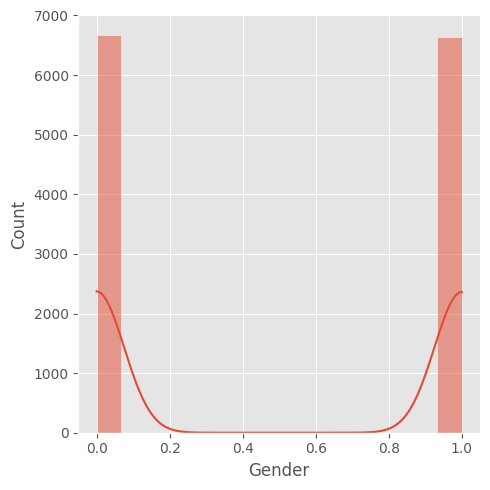

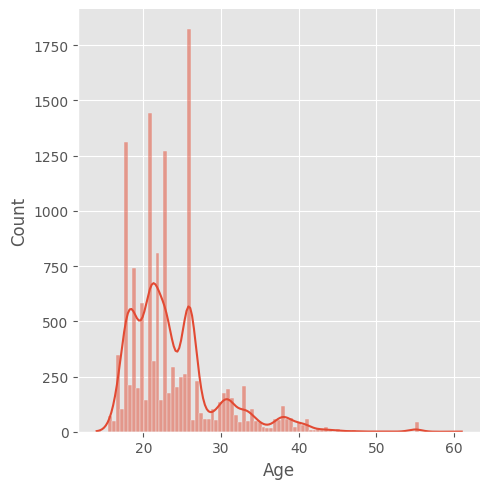

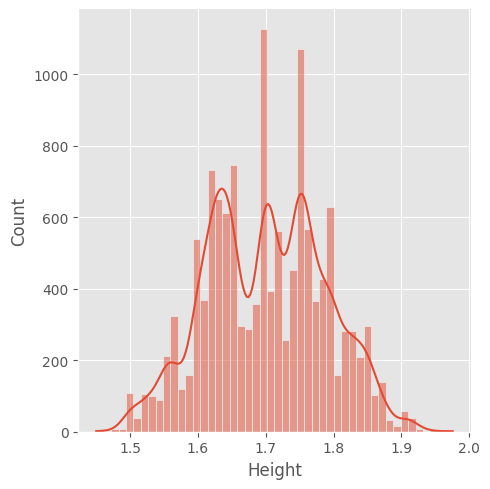

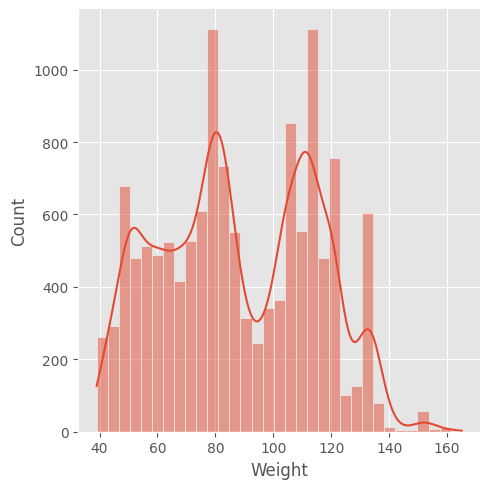

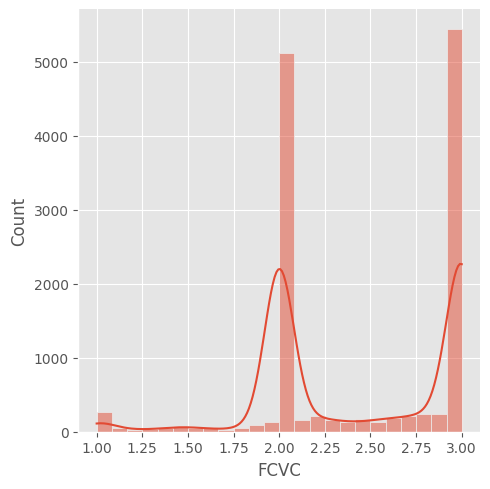

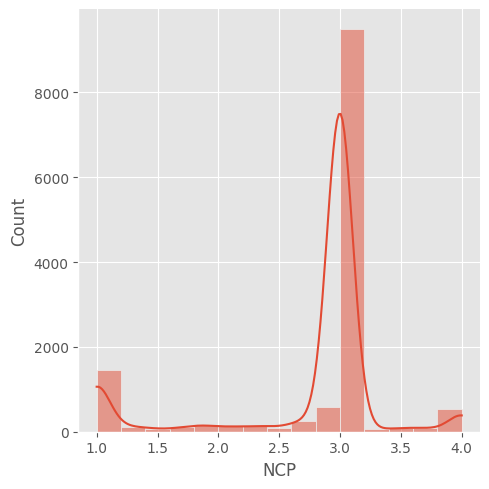

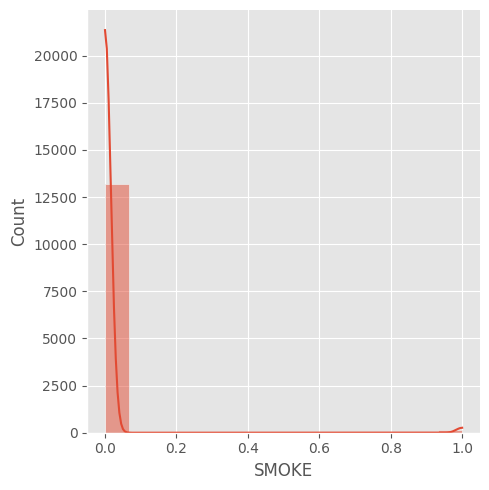

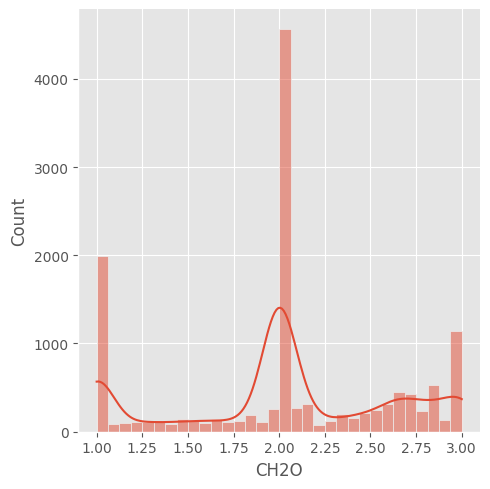

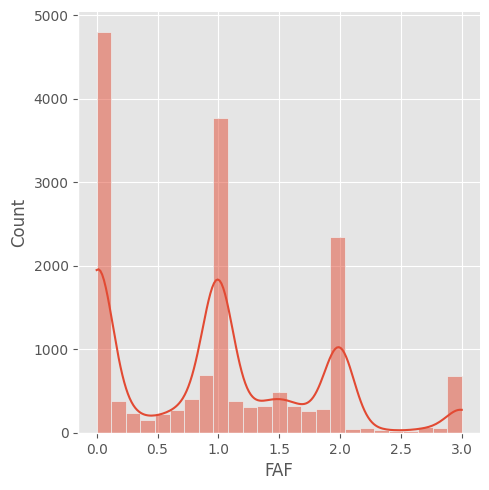

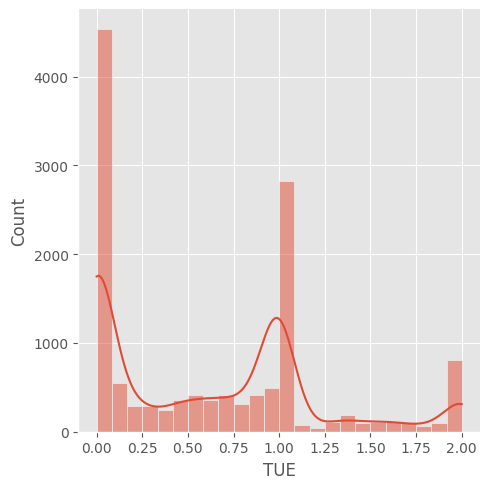

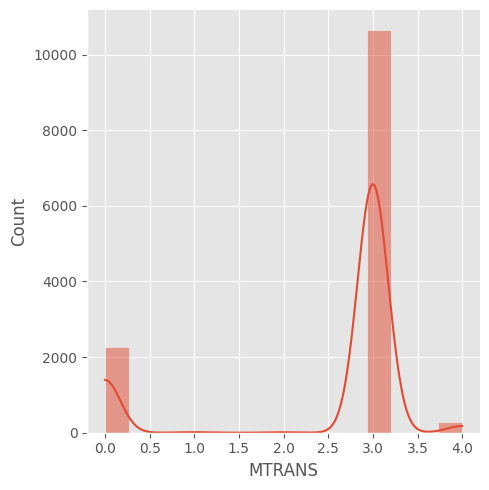

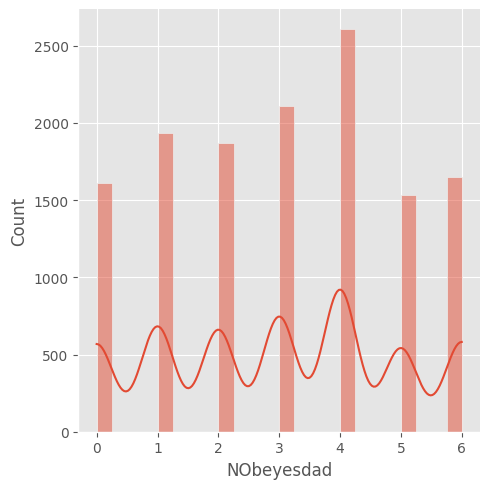

In [56]:
show_displots(df_copy, columns=df_copy.columns)

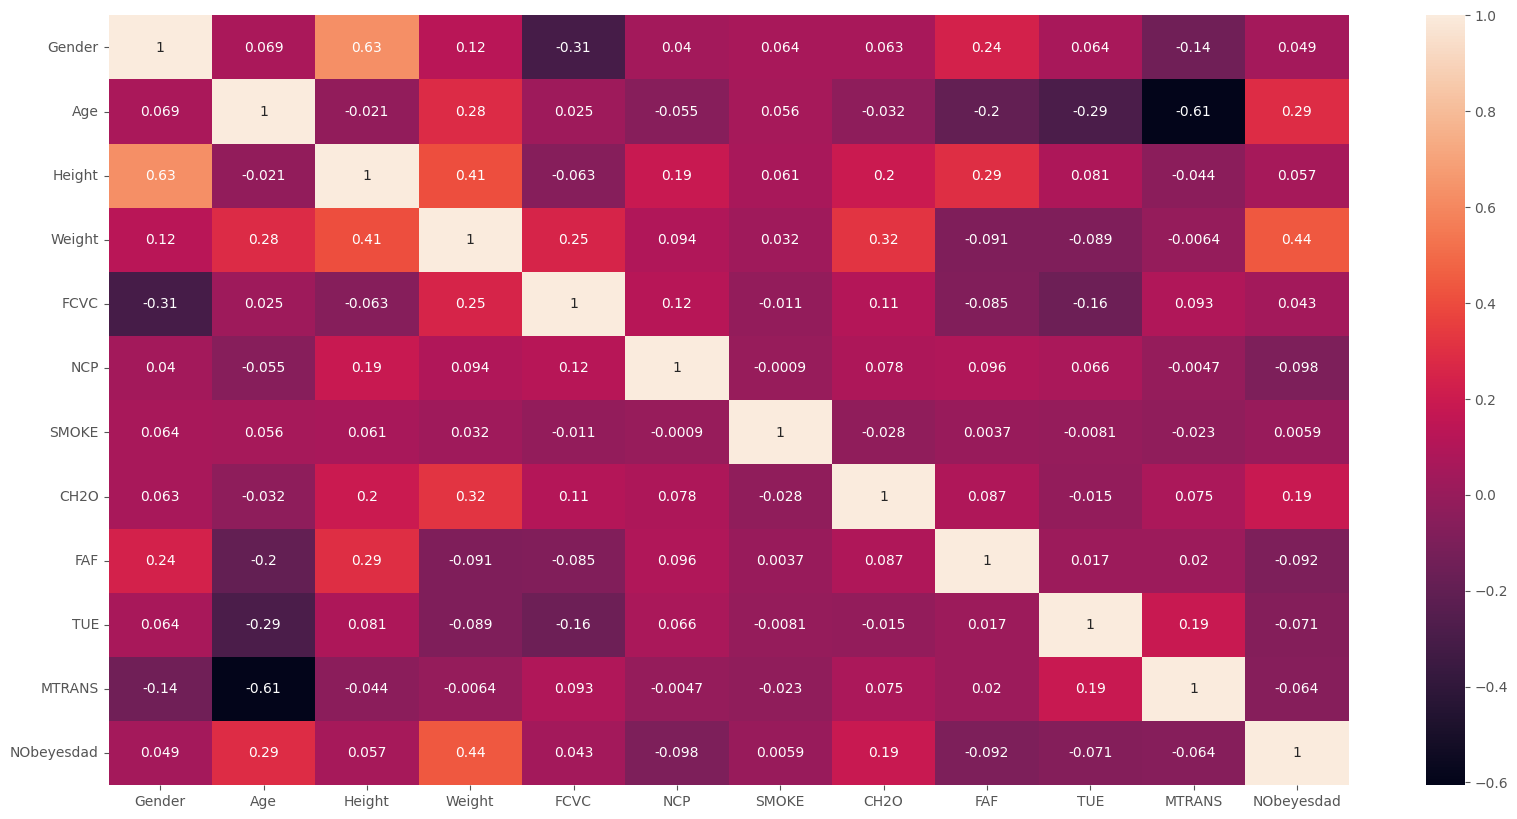

In [60]:
plt.figure(figsize=(20,10))
sns.heatmap(df_copy.corr(), annot=True)
plt.show()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [57]:
# Write your code here. Add as many boxes as you need.
missing_table(df_copy)

Feature  CountMissing  PercentageMissing  Total
0       Gender          3305          19.886876  16619
1          Age          3308          19.904928  16619
2       Height          3262          19.628136  16619
3       Weight          3397          20.440460  16619
4         FCVC          3315          19.947049  16619
5          NCP          3237          19.477706  16619
6        SMOKE          3293          19.814670  16619
7         CH2O          3338          20.085444  16619
8          FAF             0           0.000000  16619
9          TUE          3331          20.043324  16619
10      MTRANS          3381          20.344184  16619
11  NObeyesdad          3313          19.935014  16619

<Axes: >

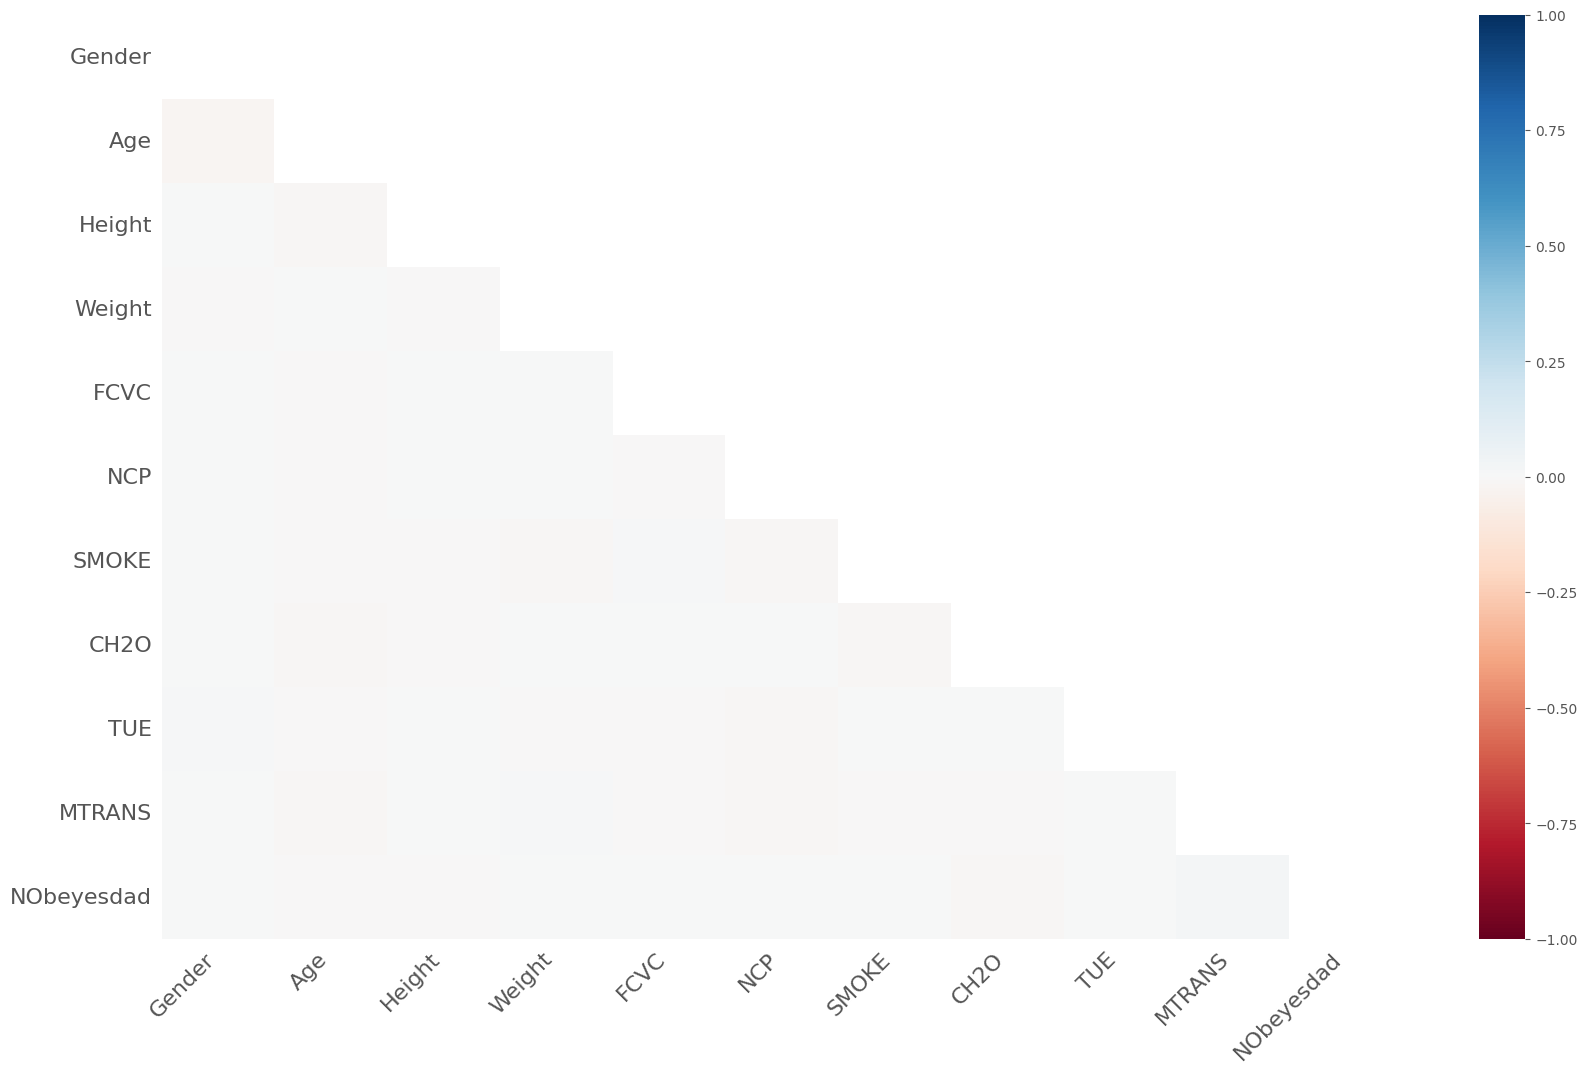

In [61]:
msno.heatmap(df_copy)

<Axes: >

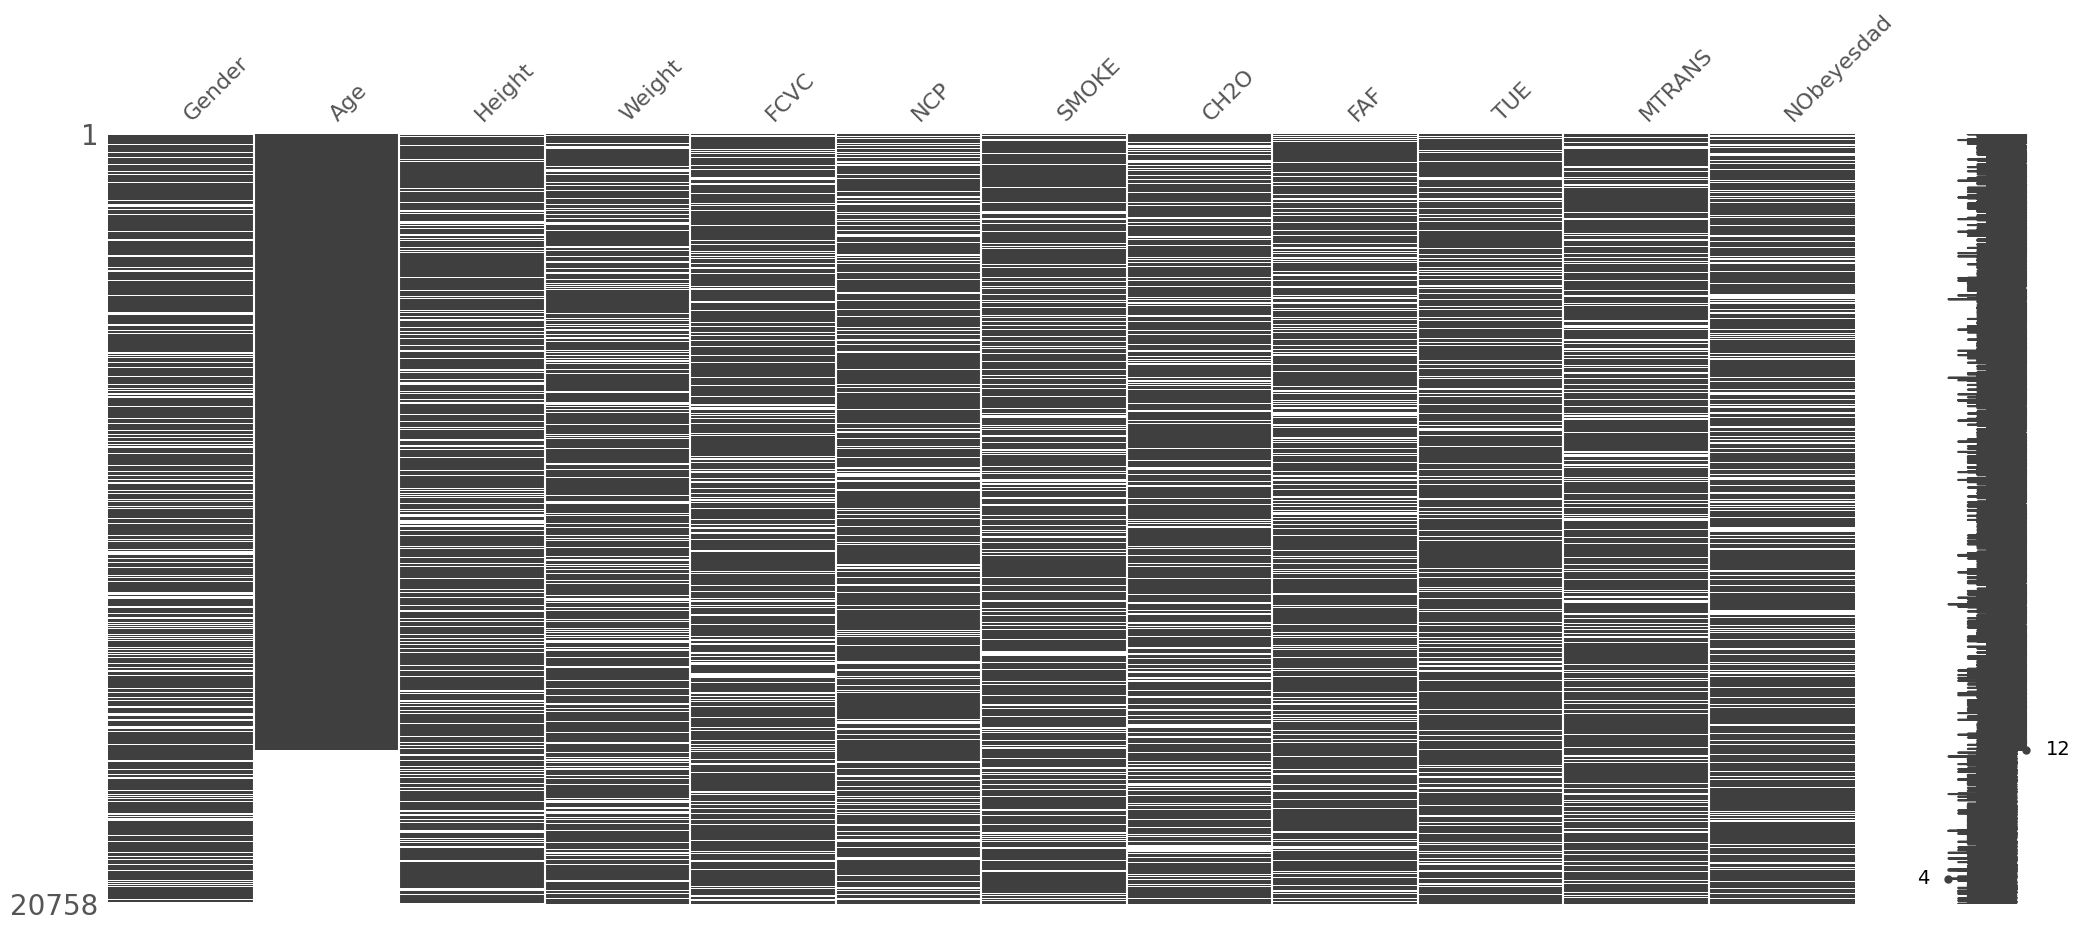

In [63]:
msno.matrix(df.sort_values("Age"))

<Axes: >

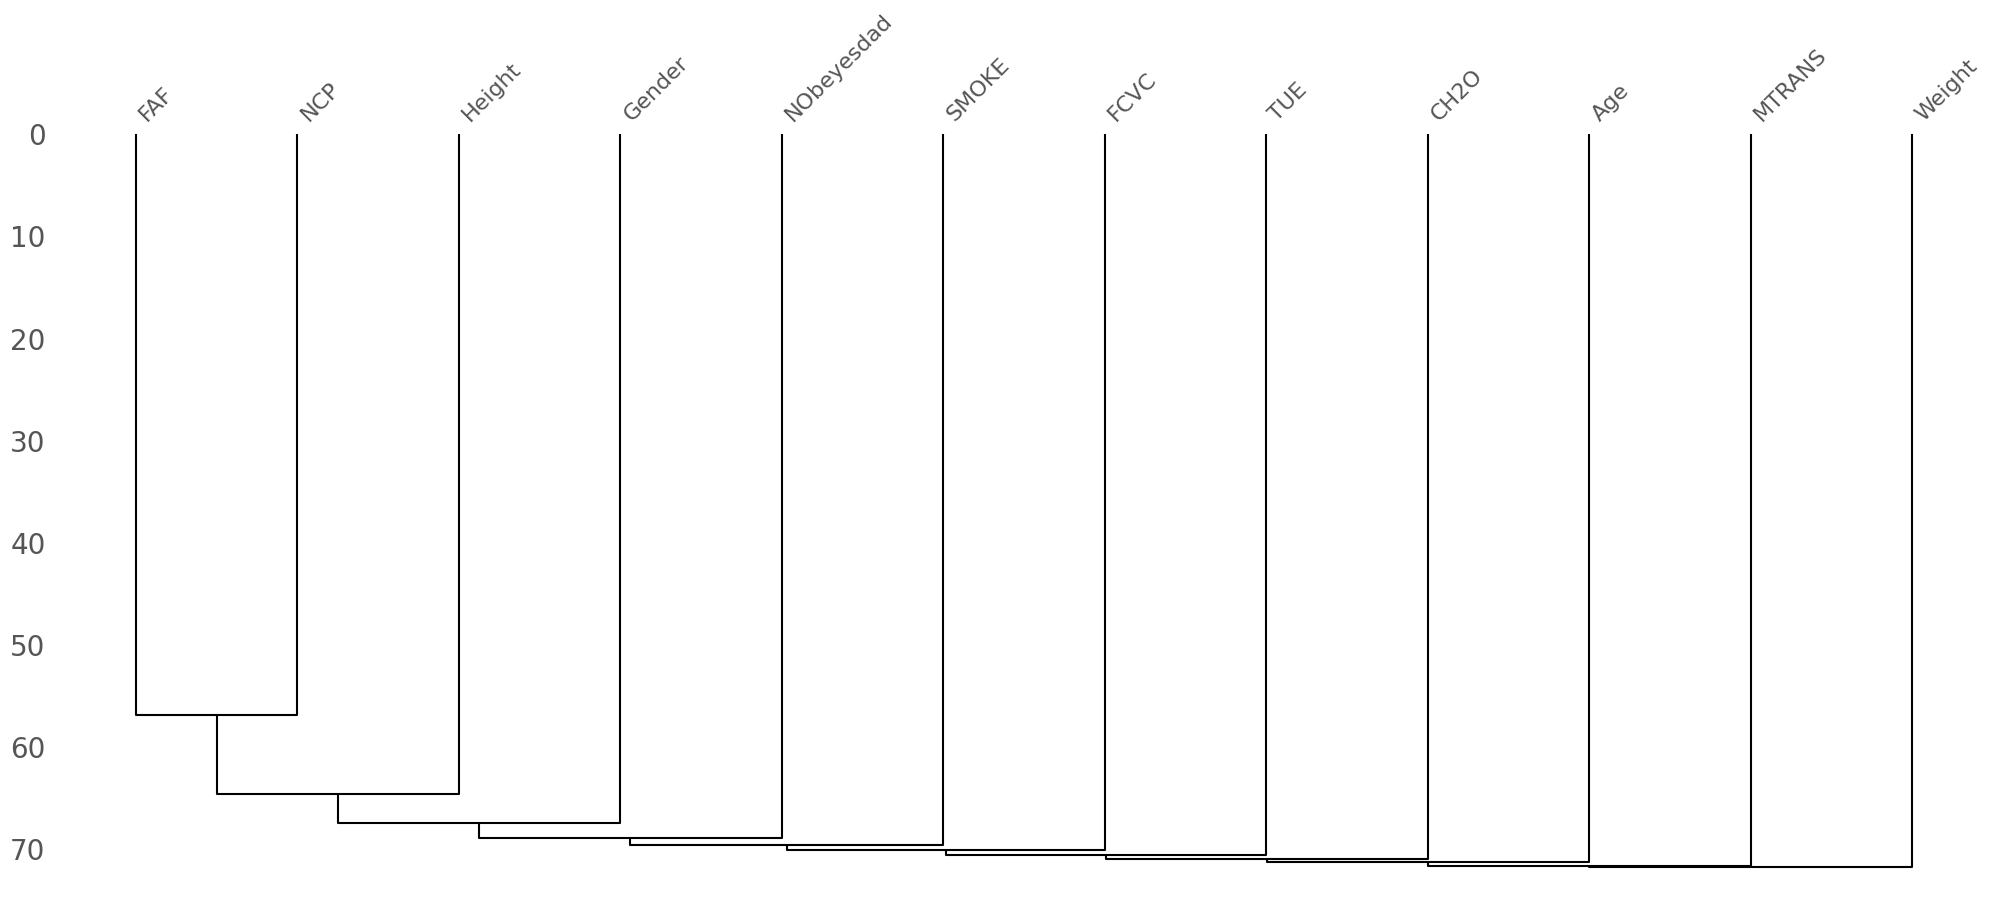

In [64]:
msno.dendrogram(df_copy)

In [65]:
df_copy.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'SMOKE', 'CH2O',
       'FAF', 'TUE', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [66]:
df_copy1=correlated_imputer(df_copy, correlated_columns=["Gender", "Height"], strategy="mice", )

In [67]:
df_copy2=correlated_imputer(df_copy1, correlated_columns=["Weight", "Height"], strategy="mice", )


In [68]:
missing_table(df_copy2)

Feature  CountMissing  PercentageMissing  Total
0       Gender             0           0.000000  16619
1          Age          3308          19.904928  16619
2       Height             0           0.000000  16619
3       Weight             0           0.000000  16619
4         FCVC          3315          19.947049  16619
5          NCP          3237          19.477706  16619
6        SMOKE          3293          19.814670  16619
7         CH2O          3338          20.085444  16619
8          FAF             0           0.000000  16619
9          TUE          3331          20.043324  16619
10      MTRANS          3381          20.344184  16619
11  NObeyesdad          3313          19.935014  16619

In [69]:
df_copy3=correlated_imputer(df_copy2, correlated_columns=["Age", "MTRANS"], strategy="mice", )


In [70]:
missing_table(df_copy3)

Feature  CountMissing  PercentageMissing  Total
0       Gender             0           0.000000  16619
1          Age             0           0.000000  16619
2       Height             0           0.000000  16619
3       Weight             0           0.000000  16619
4         FCVC          3315          19.947049  16619
5          NCP          3237          19.477706  16619
6        SMOKE          3293          19.814670  16619
7         CH2O          3338          20.085444  16619
8          FAF             0           0.000000  16619
9          TUE          3331          20.043324  16619
10      MTRANS             0           0.000000  16619
11  NObeyesdad          3313          19.935014  16619

In [71]:
df_copy4=correlated_imputer(df_copy3, correlated_columns=["Weight", "Gender", "FCVC"], strategy="mice", )
missing_table(df_copy4)

Feature  CountMissing  PercentageMissing  Total
0       Gender             0           0.000000  16619
1          Age             0           0.000000  16619
2       Height             0           0.000000  16619
3       Weight             0           0.000000  16619
4         FCVC             0           0.000000  16619
5          NCP          3237          19.477706  16619
6        SMOKE          3293          19.814670  16619
7         CH2O          3338          20.085444  16619
8          FAF             0           0.000000  16619
9          TUE          3331          20.043324  16619
10      MTRANS             0           0.000000  16619
11  NObeyesdad          3313          19.935014  16619

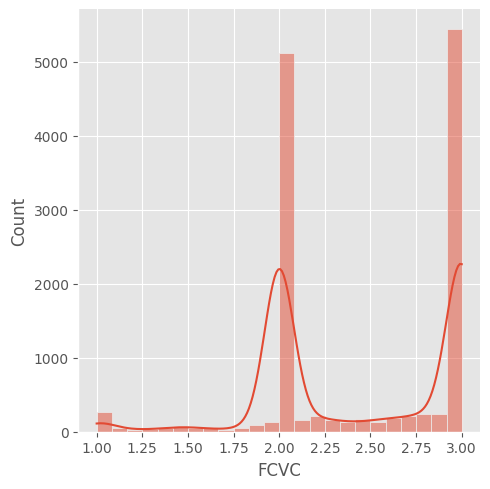

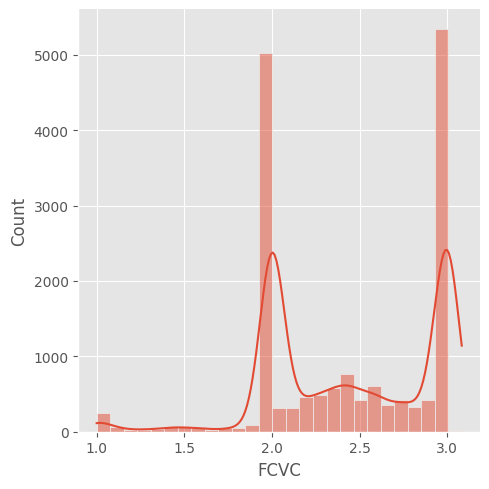

In [72]:
show_displot_before_and_after_inputation(df_copy3, df_copy4, missing_feature_name="FCVC")

In [73]:
df_copy5=uncorrelated_imputer(df_copy4, missing_feature="NCP", strategy="median", )
missing_table(df_copy5)


Feature  CountMissing  PercentageMissing  Total
0       Gender             0           0.000000  16619
1          Age             0           0.000000  16619
2       Height             0           0.000000  16619
3       Weight             0           0.000000  16619
4         FCVC             0           0.000000  16619
5          NCP             0           0.000000  16619
6        SMOKE          3293          19.814670  16619
7         CH2O          3338          20.085444  16619
8          FAF             0           0.000000  16619
9          TUE          3331          20.043324  16619
10      MTRANS             0           0.000000  16619
11  NObeyesdad          3313          19.935014  16619

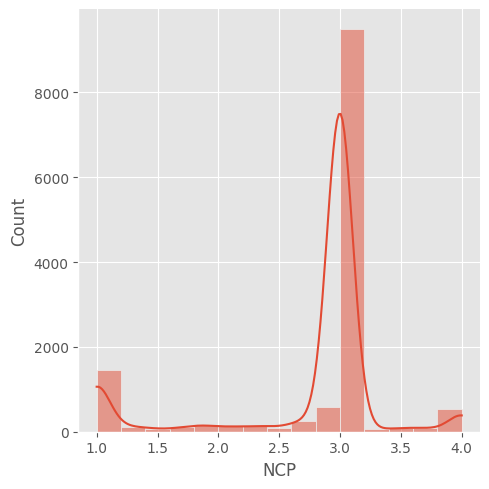

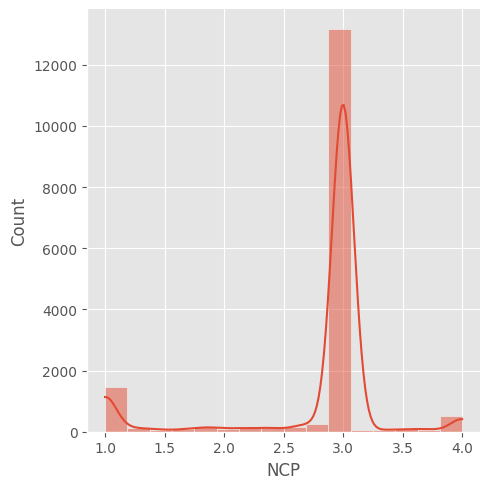

In [76]:
show_displot_before_and_after_inputation(df_copy4, df_copy5, missing_feature_name="NCP")

In [75]:
df_copy6=uncorrelated_imputer(df_copy5, missing_feature="SMOKE", strategy="const", const_value=df_copy5["SMOKE"].mode()[0])
missing_table(df_copy6)

Feature  CountMissing  PercentageMissing  Total
0       Gender             0           0.000000  16619
1          Age             0           0.000000  16619
2       Height             0           0.000000  16619
3       Weight             0           0.000000  16619
4         FCVC             0           0.000000  16619
5          NCP             0           0.000000  16619
6        SMOKE             0           0.000000  16619
7         CH2O          3338          20.085444  16619
8          FAF             0           0.000000  16619
9          TUE          3331          20.043324  16619
10      MTRANS             0           0.000000  16619
11  NObeyesdad          3313          19.935014  16619

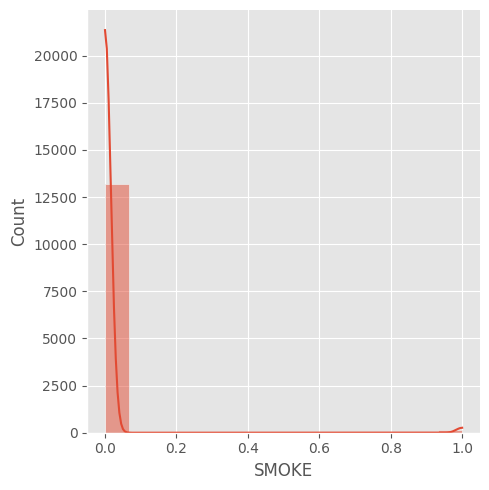

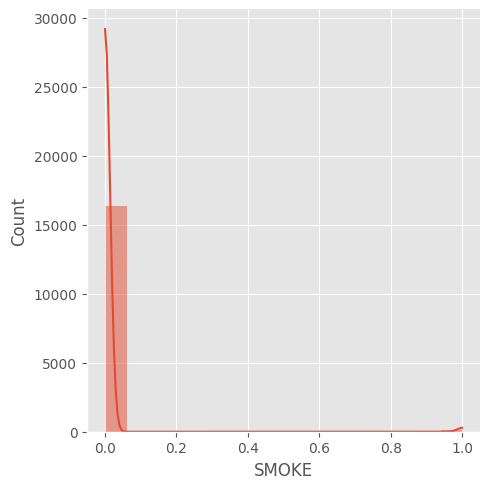

In [78]:
show_displot_before_and_after_inputation(df_copy5, df_copy6, missing_feature_name="SMOKE")


In [79]:
missing_table(df_copy6)

Feature  CountMissing  PercentageMissing  Total
0       Gender             0           0.000000  16619
1          Age             0           0.000000  16619
2       Height             0           0.000000  16619
3       Weight             0           0.000000  16619
4         FCVC             0           0.000000  16619
5          NCP             0           0.000000  16619
6        SMOKE             0           0.000000  16619
7         CH2O          3338          20.085444  16619
8          FAF             0           0.000000  16619
9          TUE          3331          20.043324  16619
10      MTRANS             0           0.000000  16619
11  NObeyesdad          3313          19.935014  16619

In [81]:
df_copy7=correlated_imputer(df_copy6, correlated_columns=["CH2O", "Weight"], strategy="mice")
missing_table(df_copy7)

Feature  CountMissing  PercentageMissing  Total
0       Gender             0           0.000000  16619
1          Age             0           0.000000  16619
2       Height             0           0.000000  16619
3       Weight             0           0.000000  16619
4         FCVC             0           0.000000  16619
5          NCP             0           0.000000  16619
6        SMOKE             0           0.000000  16619
7         CH2O             0           0.000000  16619
8          FAF             0           0.000000  16619
9          TUE          3331          20.043324  16619
10      MTRANS             0           0.000000  16619
11  NObeyesdad          3313          19.935014  16619

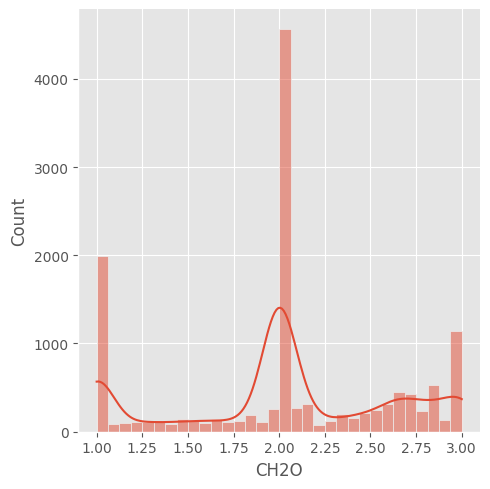

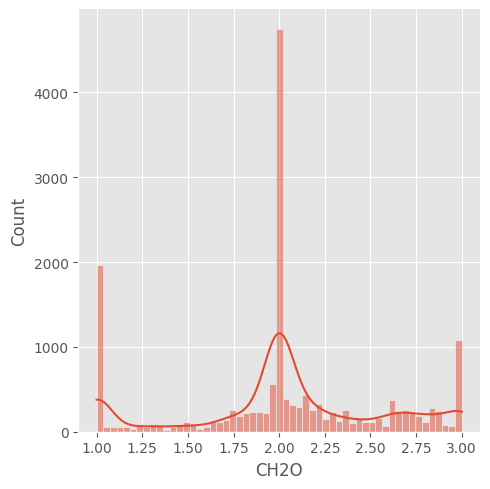

In [82]:
show_displot_before_and_after_inputation(df_copy6,df_copy7, missing_feature_name="CH2O")

In [83]:
df_copy8=correlated_imputer(df_copy7, correlated_columns=["TUE", "Age"], strategy="mice")
missing_table(df_copy8)

Feature  CountMissing  PercentageMissing  Total
0       Gender             0           0.000000  16619
1          Age             0           0.000000  16619
2       Height             0           0.000000  16619
3       Weight             0           0.000000  16619
4         FCVC             0           0.000000  16619
5          NCP             0           0.000000  16619
6        SMOKE             0           0.000000  16619
7         CH2O             0           0.000000  16619
8          FAF             0           0.000000  16619
9          TUE             0           0.000000  16619
10      MTRANS             0           0.000000  16619
11  NObeyesdad          3313          19.935014  16619

In [84]:
df_copy9=correlated_imputer(df_copy8, correlated_columns=["NObeyesdad", "Weight", "Age"], strategy="mice")
missing_table(df_copy9)

Feature  CountMissing  PercentageMissing  Total
0       Gender             0                0.0  16619
1          Age             0                0.0  16619
2       Height             0                0.0  16619
3       Weight             0                0.0  16619
4         FCVC             0                0.0  16619
5          NCP             0                0.0  16619
6        SMOKE             0                0.0  16619
7         CH2O             0                0.0  16619
8          FAF             0                0.0  16619
9          TUE             0                0.0  16619
10      MTRANS             0                0.0  16619
11  NObeyesdad             0                0.0  16619

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

In [49]:
# Write your code here. Add as many boxes as you need.
m

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [50]:
# Write your code here. Add as many boxes as you need.

## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [88]:
# Write your code here. Add as many boxes as you need.
temp = df_copy9["Gender"].round()
df_copy9["Gender"] = temp
df_copy9

Gender        Age    Height      Weight      FCVC       NCP  SMOKE  \
0         1.0  24.443011  1.699998   81.669950  2.000000  2.983297    0.0   
2         0.0  18.000000  1.638494   50.165754  2.399622  1.411685    0.0   
3         1.0  20.952737  1.710730  131.274851  3.000000  3.000000    0.0   
4         1.0  31.641081  1.914186  112.980205  2.411018  1.971472    0.0   
5         1.0  18.128249  1.748524   51.552595  2.919751  3.000000    0.0   
...       ...        ...       ...         ...       ...       ...    ...   
20752     0.0  40.000000  1.638494   77.561602  2.568382  3.000000    0.0   
20753     0.0  22.134740  1.700822  114.187096  2.919584  3.000000    0.0   
20755     1.0  20.101026  1.819557  105.580491  2.407817  3.000000    0.0   
20756     0.0  33.852953  1.700000   83.520113  2.418759  1.971472    0.0   
20757     1.0  26.680376  1.816547  118.134898  3.000000  3.000000    0.0   

           CH2O       FAF       TUE    MTRANS  NObeyesdad  
0      2.763573  0.000000  0.976473  3.000000    2.861767  
2      1.744361  0.866045  0.799784  3.000000    0.000000  
3      1.674061  1.467863  0.780199  3.000000    4.006142  
4      2.218256  1.967973  0.931721  3.000000    6.000000  
5      2.137550  1.930033  0.795834  3.000000    1.631201  
...         ...       ...       ...       ...         ...  
20752  1.131169  0.281734  0.522259  0.241490    2.000000  
20753  2.151809  1.330519  0.196680  3.000000    3.000000  
20755  2.000000  1.158040  1.198439  3.000000    3.244426  
20756  2.144838  0.000000  0.311471  1.102971    3.510492  
20757  2.003563  0.684487  0.713823  3.000000    3.000000  

[16619 rows x 12 columns]

In [89]:
df_copy10 = df_copy9.copy()

In [91]:
df_copy10["NObeyesdad"] =  df_copy10["NObeyesdad"].round()
df_copy10["MTRANS"] =  df_copy10["MTRANS"].round()
df_copy10["SMOKE"] =  df_copy10["SMOKE"].round()

In [92]:
df_copy10

Gender        Age    Height      Weight      FCVC       NCP  SMOKE  \
0         1.0  24.443011  1.699998   81.669950  2.000000  2.983297    0.0   
2         0.0  18.000000  1.638494   50.165754  2.399622  1.411685    0.0   
3         1.0  20.952737  1.710730  131.274851  3.000000  3.000000    0.0   
4         1.0  31.641081  1.914186  112.980205  2.411018  1.971472    0.0   
5         1.0  18.128249  1.748524   51.552595  2.919751  3.000000    0.0   
...       ...        ...       ...         ...       ...       ...    ...   
20752     0.0  40.000000  1.638494   77.561602  2.568382  3.000000    0.0   
20753     0.0  22.134740  1.700822  114.187096  2.919584  3.000000    0.0   
20755     1.0  20.101026  1.819557  105.580491  2.407817  3.000000    0.0   
20756     0.0  33.852953  1.700000   83.520113  2.418759  1.971472    0.0   
20757     1.0  26.680376  1.816547  118.134898  3.000000  3.000000    0.0   

           CH2O       FAF       TUE  MTRANS  NObeyesdad  
0      2.763573  0.000000  0.976473     3.0         3.0  
2      1.744361  0.866045  0.799784     3.0         0.0  
3      1.674061  1.467863  0.780199     3.0         4.0  
4      2.218256  1.967973  0.931721     3.0         6.0  
5      2.137550  1.930033  0.795834     3.0         2.0  
...         ...       ...       ...     ...         ...  
20752  1.131169  0.281734  0.522259     0.0         2.0  
20753  2.151809  1.330519  0.196680     3.0         3.0  
20755  2.000000  1.158040  1.198439     3.0         3.0  
20756  2.144838  0.000000  0.311471     1.0         4.0  
20757  2.003563  0.684487  0.713823     3.0         3.0  

[16619 rows x 12 columns]

In [93]:
df_copy_11 = df_copy10

In [94]:
Y = df_copy_11["FAF"]
X = df_copy_11.drop(columns="FAF")

In [96]:
xgb_classifier = XGBClassifier(
    n_estimators=100,         # Number of boosting rounds (trees)
    learning_rate=0.1,        # Step size shrinkage
    max_depth=6, 
)

## Hyper-parameter optimization

Train an XGBoost Model, optimize it's hyper-parameters with grid-search and 5-fold cross validation on the training set.

In [103]:
# Write your code here. Add as many boxes as you need.
params_grid = {
    "n_estimators":[100,200,300],         # Number of boosting rounds (trees)
    "learning_rate":[0.1, 0.01, 0.001],        # Step size shrinkage
    "max_depth":[3,6,8],
}

In [97]:
from sklearn.model_selection import GridSearchCV

In [104]:
grid_search_cv = GridSearchCV(XGBRegressor(), params_grid, scoring="r2", cv=5)

In [105]:
grid_search_cv.fit(X,Y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 6, 8],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [106]:
grid_search_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

In [107]:
grid_search_cv.best_score_


np.float64(0.328855000290664)

# Cross-validation evaluation

Perform leave-one out cross validation on the entire dataset, with an untrained model with the chosen hyper-parameters from the previous step.

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [54]:
# Write your code here. Add as many boxes as you need.